<ipython-input-56-45cf4b343cb4>:28: RuntimeWarning: divide by zero encountered in true_divide
  d = np.minimum(1, r / np.sqrt((X - x_0) ** 2 + (Y - y_0) ** 2))
<ipython-input-56-45cf4b343cb4>:123: RuntimeWarning: divide by zero encountered in double_scalars
  d = np.minimum(1, r / np.sqrt((i*dx - x_0) ** 2 + (j*dy - y_0) ** 2))


Two_D_diffusion
[776.98372535 776.87011401 776.7619907  ... 757.97434442 757.96910636
 757.96387124]


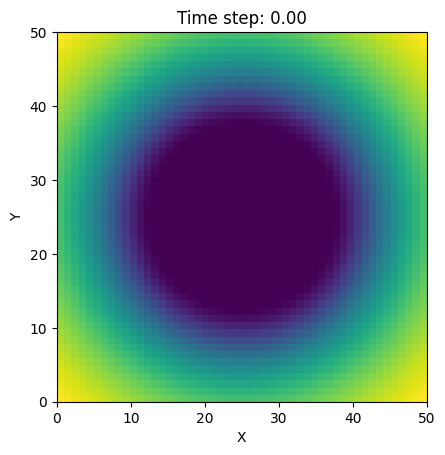

CalledProcessError: ignored

In [ ]:
from numpy.core.multiarray import dtype
import sys
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML
from google.colab import files


# Define grid parameters
Lx = Ly = 50        # Length of domain in x and y directions
nx = ny = 51        # Number of grid points in x and y directions
dx = Lx / (nx - 1)  # Grid spacing in x direction
dy = Ly / (ny - 1)  # Grid spacing in y direction

# Define simulation parameters
vx = vy = 1.0           # Advection velocities in x and y directions
gamma = 0.1             # Diffusivity
A = 1.0                 # Amplitude of initial disturbance
r = 12.5                # Radius of initial disturbance
x_0, y_0 = 25, 25       # Center of initial disturbance
T_total = 400            # Total simulation time
# dt = 0.5                # Time step to satisfy dt*v/(dx or dy) <= 1/2

# Define initial condition
X, Y = np.meshgrid(np.linspace(0, Lx, nx), np.linspace(0, Ly, ny))
d = np.minimum(1, r / np.sqrt((X - x_0) ** 2 + (Y - y_0) ** 2))
# u = 0.5 * A * (np.cos(np.pi * d) + 1)

fig, ax = plt.subplots()
ax.set_xlim(0,50)
ax.set_ylim(0,50)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Advection of Initial Disturbance')

im = ax.imshow(0.5 * A * (np.cos(np.pi * d) + 1))

def animate(frame, u,t_delta):
    ax.clear()
    ax.imshow(u[frame, :, :], origin='lower', extent=[0, Lx, 0, Ly])
    ax.set_title("Time step: {0:.2f}".format(frame * t_delta))
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    return [im]

def Two_D_advection(t_delta):
  print("Two_D_advection")
  t_steps = int(T_total/t_delta)
  CFLx = vx*t_delta/dx
  CFLy = vy*t_delta/dy
  CFL = CFLx + CFLy

  u = np.zeros((t_steps+1,nx,ny))
  U_max = np.zeros(t_steps+1)
  U_sum = np.zeros(t_steps+1)
  u_i0 = np.zeros((nx,ny))

  for i in range(nx):
    for j in range(ny):
      d = np.minimum(1, r / np.sqrt((i*dx - x_0) ** 2 + (j*dy - y_0) ** 2))
      u[0,i,j] = 0.5 * A * (np.cos(np.pi * d) + 1)


  # for i in range(0,nx):
  #   for j in range(0,ny):
  #     u_i0[i,j] = u[0,i,j] - CFLx*(u[0,(i+1)%(nx-1),j] - u[0,(i-1)%(nx-1),j]) - CFLy*(u[0,i,(j+1)%(ny-1)] - u[0,i,(j-1)%(ny-1)])

  for i in range(1,nx):
    for j in range(1,ny):
      # u[1,i,j] = u[0,i,j] - CFLx*(u[0,(i+1)%(nx-1),j] - u[0,(i-1)%(nx-1),j]) - CFLy*(u[0,i,(j+1)%(ny-1)] - u[0,i,(j-1)%(ny-1)])
      u[1,i,j] = u[0,i,j] - CFLx*(u[0,(i+1)%(nx-1),j] - u[0,(i-1),j]) - CFLy*(u[0,i,(j+1)%(ny-1)] - u[0,i,(j-1)])
    u[1,i,0] = u[1,i,50]
  u[1,0,:] = u[1,50,:]
      # u[1,i,j] = u[0,i,j] - CFLx*((u[0,(i+1)%(nx-1),j] - u[0,(i-1)%(nx-1),j]) + (u_i0[(i+1)%(nx-1),j] - u_i0[(i-1)%(nx-1),j])) - CFLy*((u[0,i,(j+1)%(ny-1)] - u[0,i,(j-1)%ny]) + (u_i0[i,(j+1)%(ny-1)] - u_i0[i,(j-1)%(ny-1)]))
      
  for n in range (1,t_steps):  
    for i in range(1,nx):
      for j in range(1,ny):
        u[n+1,i,j] = u[n-1,i,j] - CFLx*(u[n,(i+1)%(nx-1),j] - u[n,(i-1),j]) - CFLy*(u[n,i,(j+1)%(ny-1)] - u[n,i,(j-1)])
      u[n+1,i,0] = u[n+1,i,50]
    u[n+1,0,:] = u[n+1,50,:]
  for n in range(t_steps+1):
    U = 0.0
    print("time step n:{} max:{}".format(n,np.max(u[n,:,:])))
    print("time step n:{} min:{}".format(n,np.min(u[n,:,:])))
    for i in range(nx):
      for j in range(ny):
        U += (u[n,i,j]*dx*dy)
        if((n*t_delta)%50 == 0):
          tolerance = 1e-1  # set a tolerance level
          equal = np.allclose(u[0,i,j], u[n,i,j], atol=tolerance)  # check if the arrays are equal within the tolerance level
          if not equal:
            print("n:{}i:{} j:{} value:{} vs. inital value:{}".format(n,i,j,u[n,i,j],u[0,i,j]))

    U_max[n] = U
  print(U_max)
  anim = animation.FuncAnimation(fig, animate, frames=t_steps,fargs=(u,t_delta),interval=50, blit=True)
  plt.show()
  anim.save('animation.mp4', writer='ffmpeg')
  files.download('animation.mp4')
  # plt.show()
  # anim.save('animation.mp4', writer='ffmpeg')
  # files.download('animation.mp4')
  # plt.show()


def Two_D_diffusion(t_delta):
  print("Two_D_diffusion")
  t_steps = int(T_total/t_delta)
  CFLx = gamma*t_delta/(dx**2)
  CFLy = gamma*t_delta/(dy**2)
  CFL = CFLx + CFLy

  u = np.zeros((t_steps+1,nx,ny))
  U_max = np.zeros(t_steps+1)
  U_sum = np.zeros(t_steps+1)
  u_i0 = np.zeros((nx,ny))
  
  for i in range(nx):
    for j in range(ny):
      d = np.minimum(1, r / np.sqrt((i*dx - x_0) ** 2 + (j*dy - y_0) ** 2))
      u[0,i,j] = 0.5 * A * (np.cos(np.pi * d) + 1)

  for n in range (0,t_steps):  
    for i in range(1,nx):
      for j in range(1,ny):
        u[n+1,i,j] = u[n,i,j] + CFLx*(u[n,(i+1)%(nx-1),j]- 2*u[n,i,j] + u[n,(i-1)%(nx-1),j]) + CFLy*(u[n,i,(j+1)%(ny-1)] - 2*u[n,i,j]+ u[n,i,(j-1)])
      u[n+1,i,0] = u[n+1,i,50]
    u[n+1,0,:] = u[n+1,50,:]
  for n in range(t_steps+1):
    U = 0.0
    for i in range(nx):
      for j in range(ny):
        U += (u[n,i,j]*dx*dy)
        # if((n*t_delta)%50 == 0):
        #   tolerance = 1e-1  # set a tolerance level
        #   equal = np.allclose(u[0,i,j], u[n,i,j], atol=tolerance)  # check if the arrays are equal within the tolerance level
        #   if not equal:
        #     print("n:{}i:{} j:{} value:{} vs. inital value:{}".format(n,i,j,u[n,i,j],u[0,i,j]))

    U_max[n] = U
  print(U_max)
  anim = animation.FuncAnimation(fig, animate, frames=t_steps,fargs=(u,t_delta),interval=50, blit=True)
  plt.show()
  anim.save('animation3.mp4', writer='ffmpeg')
  files.download('animation3.mp4')
  
def Two_D_advection_diffusion(t_delta):
  print("Two_D_advection_diffusion")
  t_steps = int(T_total/t_delta)
  CFLx = gamma*t_delta/(dx**2)
  CFLy = gamma*t_delta/(dy**2)
  Diffx = gamma*t_delta/(dx**2)
  Diffy = gamma*t_delta/(dy**2)
  CFL = CFLx + CFLy

  u = np.zeros((t_steps+1,nx,ny))
  U_max = np.zeros(t_steps+1)
  U_sum = np.zeros(t_steps+1)
  u_i0 = np.zeros((nx,ny))

  for i in range(nx):
    for j in range(ny):
      d = np.minimum(1, r / np.sqrt((i*dx - x_0) ** 2 + (j*dy - y_0) ** 2))
      u[0,i,j] = 0.5 * A * (np.cos(np.pi * d) + 1)
      
  
  for i in range(0,nx):
    for j in range(0,ny):
      u[1,i,j] = u[0,i,j] - CFLx*(u[0,(i+1)%(nx-1),j] - u[0,(i-1)%(nx-1),j]) - CFLy*(u[0,i,(j+1)%(ny-1)] - u[0,i,(j-1)%(ny-1)])

  # for i in range(0,nx):
  #   for j in range(0,ny):
  #     u[1,i,j] = u[0,i,j] - 0.5* CFLx*(u[0,(i+1)%(nx-1),j] - u[0,(i-1)%(nx-1),j]) - CFLy*(u[0,i,(j+1)%(ny-1)] - u[0,i,(j-1)%(ny-1)])

  for n in range (1,t_steps): 
    for i in range(1,nx):
      for j in range(1,ny):
        
        if(n%2 == 0): 
          u[n+1,i,j] = u[n,i,j] +Diffx*(u[n,(i+1)%(nx-1),j]- 2*u[n,i,j] + u[n,(i-1),j]) + Diffy*(u[n,i,(j+1)%(ny-1)] - 2*u[n,i,j]+ u[n,i,(j-1)])
        else:
          u[n+1,i,j] = u[n,i,j] - CFLx*((u[n,(i+1)%(nx-1),j] - u[n,(i-1),j])) - CFLy*((u[n,i,(j+1)%(ny-1)] - u[n,i,(j-1)]))
      u[n+1,i,0] = u[n+1,i,50]
    u[n+1,0,:] = u[n+1,50,:]
  
  for n in range(t_steps+1):
    U = 0.0
    print("time step n:{} max:{}".format(n,np.max(u[n,:,:])))
    for i in range(nx):
      for j in range(ny):
        U += (u[n,i,j]*dx*dy)
        # if((n*t_delta)%50 == 0):
        #   tolerance = 1e-1  # set a tolerance level
        #   equal = np.allclose(u[0,i,j], u[n,i,j], atol=tolerance)  # check if the arrays are equal within the tolerance level
        #   if not equal:
        #     print("n:{}i:{} j:{} value:{} vs. inital value:{}".format(n,i,j,u[n,i,j],u[0,i,j]))

    U_max[n] = U
  print(U_max)
  anim = animation.FuncAnimation(fig, animate, frames=t_steps,fargs=(u,t_delta),interval=50, blit=True)
  plt.show()
  anim.save('animation2.mp4', writer='ffmpeg')
  files.download('animation2.mp4')
#Two_D_advection(0.25)
#Two_D_diffusion(0.25)
# Two_D_advection_diffusion(0.25)
